# Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat


# An class works on the k mean algorathim
# this class follow this steps:
# 1-intial centroids by one of the data set
# 2-get the distance between this centroids and the points of our data 
# 3- compute the average then change the centroids to the averages
# 4- reloop this steps

In [10]:
class kmean_alg:
  def __init__(self, x):
    self.x=x
    self.centroide=None
    self.idx=None
  def init_centroids(self,number_of_centroides):
        m, n = self.x.shape ##get the number of rows and number of featuers in the data
        self.centroide = np.zeros((number_of_centroides, n)) ##perfome an array if number of centers=3 and featuers =2 so it [[x11,x12],[x21,x22],[x31,x32]] where every point we choose are put
        idx = np.random.randint(0, m, number_of_centroides) ##an array of 3 numbers between 0 to 299 to take them as the centroides
        ## in this loop we take idx which we choose up then put them in centroids 
        for i in range(number_of_centroides):
            self.centroide[i,:] = self.x[idx[i],:]
        return self.centroide
  def __find_closest_centroids(self):
        m = self.x.shape[0] ## get the number of rows in the data
        k = self.centroide.shape[0] ## get the number of centroids 
        idx = np.zeros(m) ##makes an array of  numbers of the rows to can set every point to one of centroides 0,1,2
        for i in range(m):##will loop through all the rows 
            min_dist = 1000000##set the min distance to large number 
            for j in range(k):##loop throught the number of centroides ex:0,1,2
                dist = np.sum((self.x[i,:] - self.centroide[j,:]) ** 2) # compare the first row distance with every centroide to get the min distance 
                if dist < min_dist: ##here we compare if it min than the last one 
                    min_dist = dist ##change the min disdance if it min
                    idx[i] = j## set the row to min centroide 0 or 1 or 2 in our example
        
        return idx
  def __compute_centroids(self,number_of_centroides):
        m, n = self.x.shape ## get number of rows and featuers 
        centroids = np.zeros((number_of_centroides, n))## an  array of zeros with same centroids number 3*2 in our example to calculate the average then put here the new centroides 
        for i in range(number_of_centroides): ##looping to set every centroide
            indices = np.where(self.idx == i) ## get the rows indecices where the rows are in the i group 
            centroids[i,:] = (np.sum(self.x[indices,:], axis=1) / len(indices[0])).ravel()## set the new centroid to average 
        
        return centroids 

  # k means function
  def fit(self, max_iters):
        m, n = self.x.shape ##get the rows and featuers numbers in data
        k = self.centroide.shape[0] ##numbers of centrides
        self.idx = np.zeros(m)## set the idx with size of number of rows to all zeros [00000000]299
        for i in range(max_iters): ##loops by number which we needed
            self.idx = self.__find_closest_centroids() ## compute the rows which close to every centroide
            self.centroide = self.__compute_centroids(k) ## get the neww centroides 
        return self.idx, self.centroide
  def perdict(self,new_x):
    m=self.centroide.shape[0]
    new_x=np.array(new_x)
    min_dist = 1000000
    the_pos=None
    for i in range(m):
       dist = np.sum((new_x-self.centroide[i,:]) ** 2) # compare the first row distance with every centroide to get the min distance 
       if dist < min_dist: ##here we compare if it min than the last one 
            min_dist = dist ##change the min disdance if it min
            the_pos=i
    return the_pos


    










# Reading the file using loadmat

In [11]:
data=loadmat("/content/ex7data2.mat")

# Get the x from the data

In [12]:
x=data['X']
print(x.shape)

(300, 2)


# Make an instance from class

In [13]:
kmean_module=kmean_alg(x)

# Intialize the centroids by the nubmers of centroids need

In [14]:
kmean_module.init_centroids(3)

array([[0.94623208, 0.24522253],
       [3.18412176, 1.41410799],
       [2.14491101, 1.13582399]])

# Looping throught the epochs needs to get the our clasters and plot them since our data contains only two featuers

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

[[0.94623208 0.24522253]
 [3.18412176 1.41410799]
 [2.14491101 1.13582399]]
[1. 1. 1.

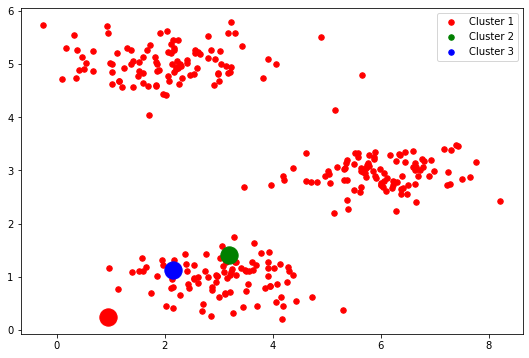

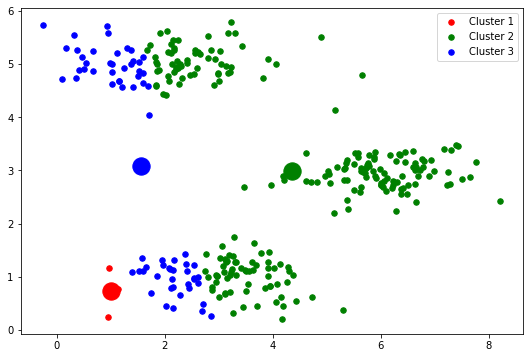

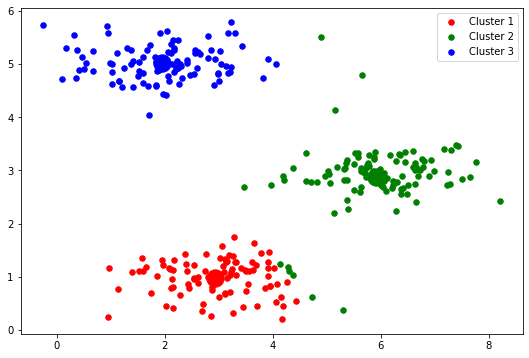

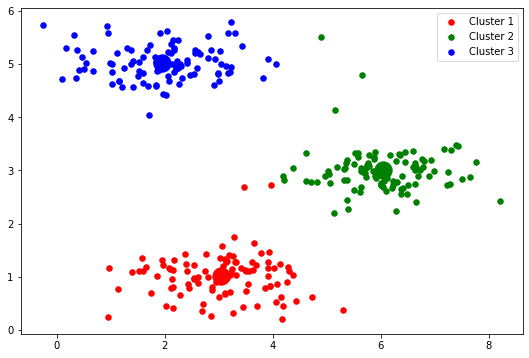

In [15]:
for i in range(4): ##here you can change the numbers of epochs

   idx, centroids = kmean_module.fit(i)
   print(idx)
   print()
   print(centroids )
   
   
   # draw it
   cluster1 = x[np.where(idx == 0)[0],:]
   cluster2 = x[np.where(idx == 1)[0],:]
   cluster3 = x[np.where(idx == 2)[0],:]
   
   fig, ax = plt.subplots(figsize=(9,6))
   ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
   ax.scatter(centroids[0,0],centroids[0,1],s=300, color='r')
   
   ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
   ax.scatter(centroids[1,0],centroids[1,1],s=300, color='g')
   
   ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
   ax.scatter(centroids[2,0],centroids[2,1],s=300, color='b')
   
   ax.legend()



In [18]:
kmean_module.perdict([2,1])

0